In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()
df = pd.read_csv("ShopSatisfactionSurveyData.csv")

# DATA CLEANING

In [21]:
df.columns = ["H", "gender", "age", "family_size", "house", "education", "net_h_income", "h_spending", "range_sat", "price_sat"]
df.set_index("H", inplace=True)

# GENERAL FIRST LOOK OF THE DATA RELATIONS

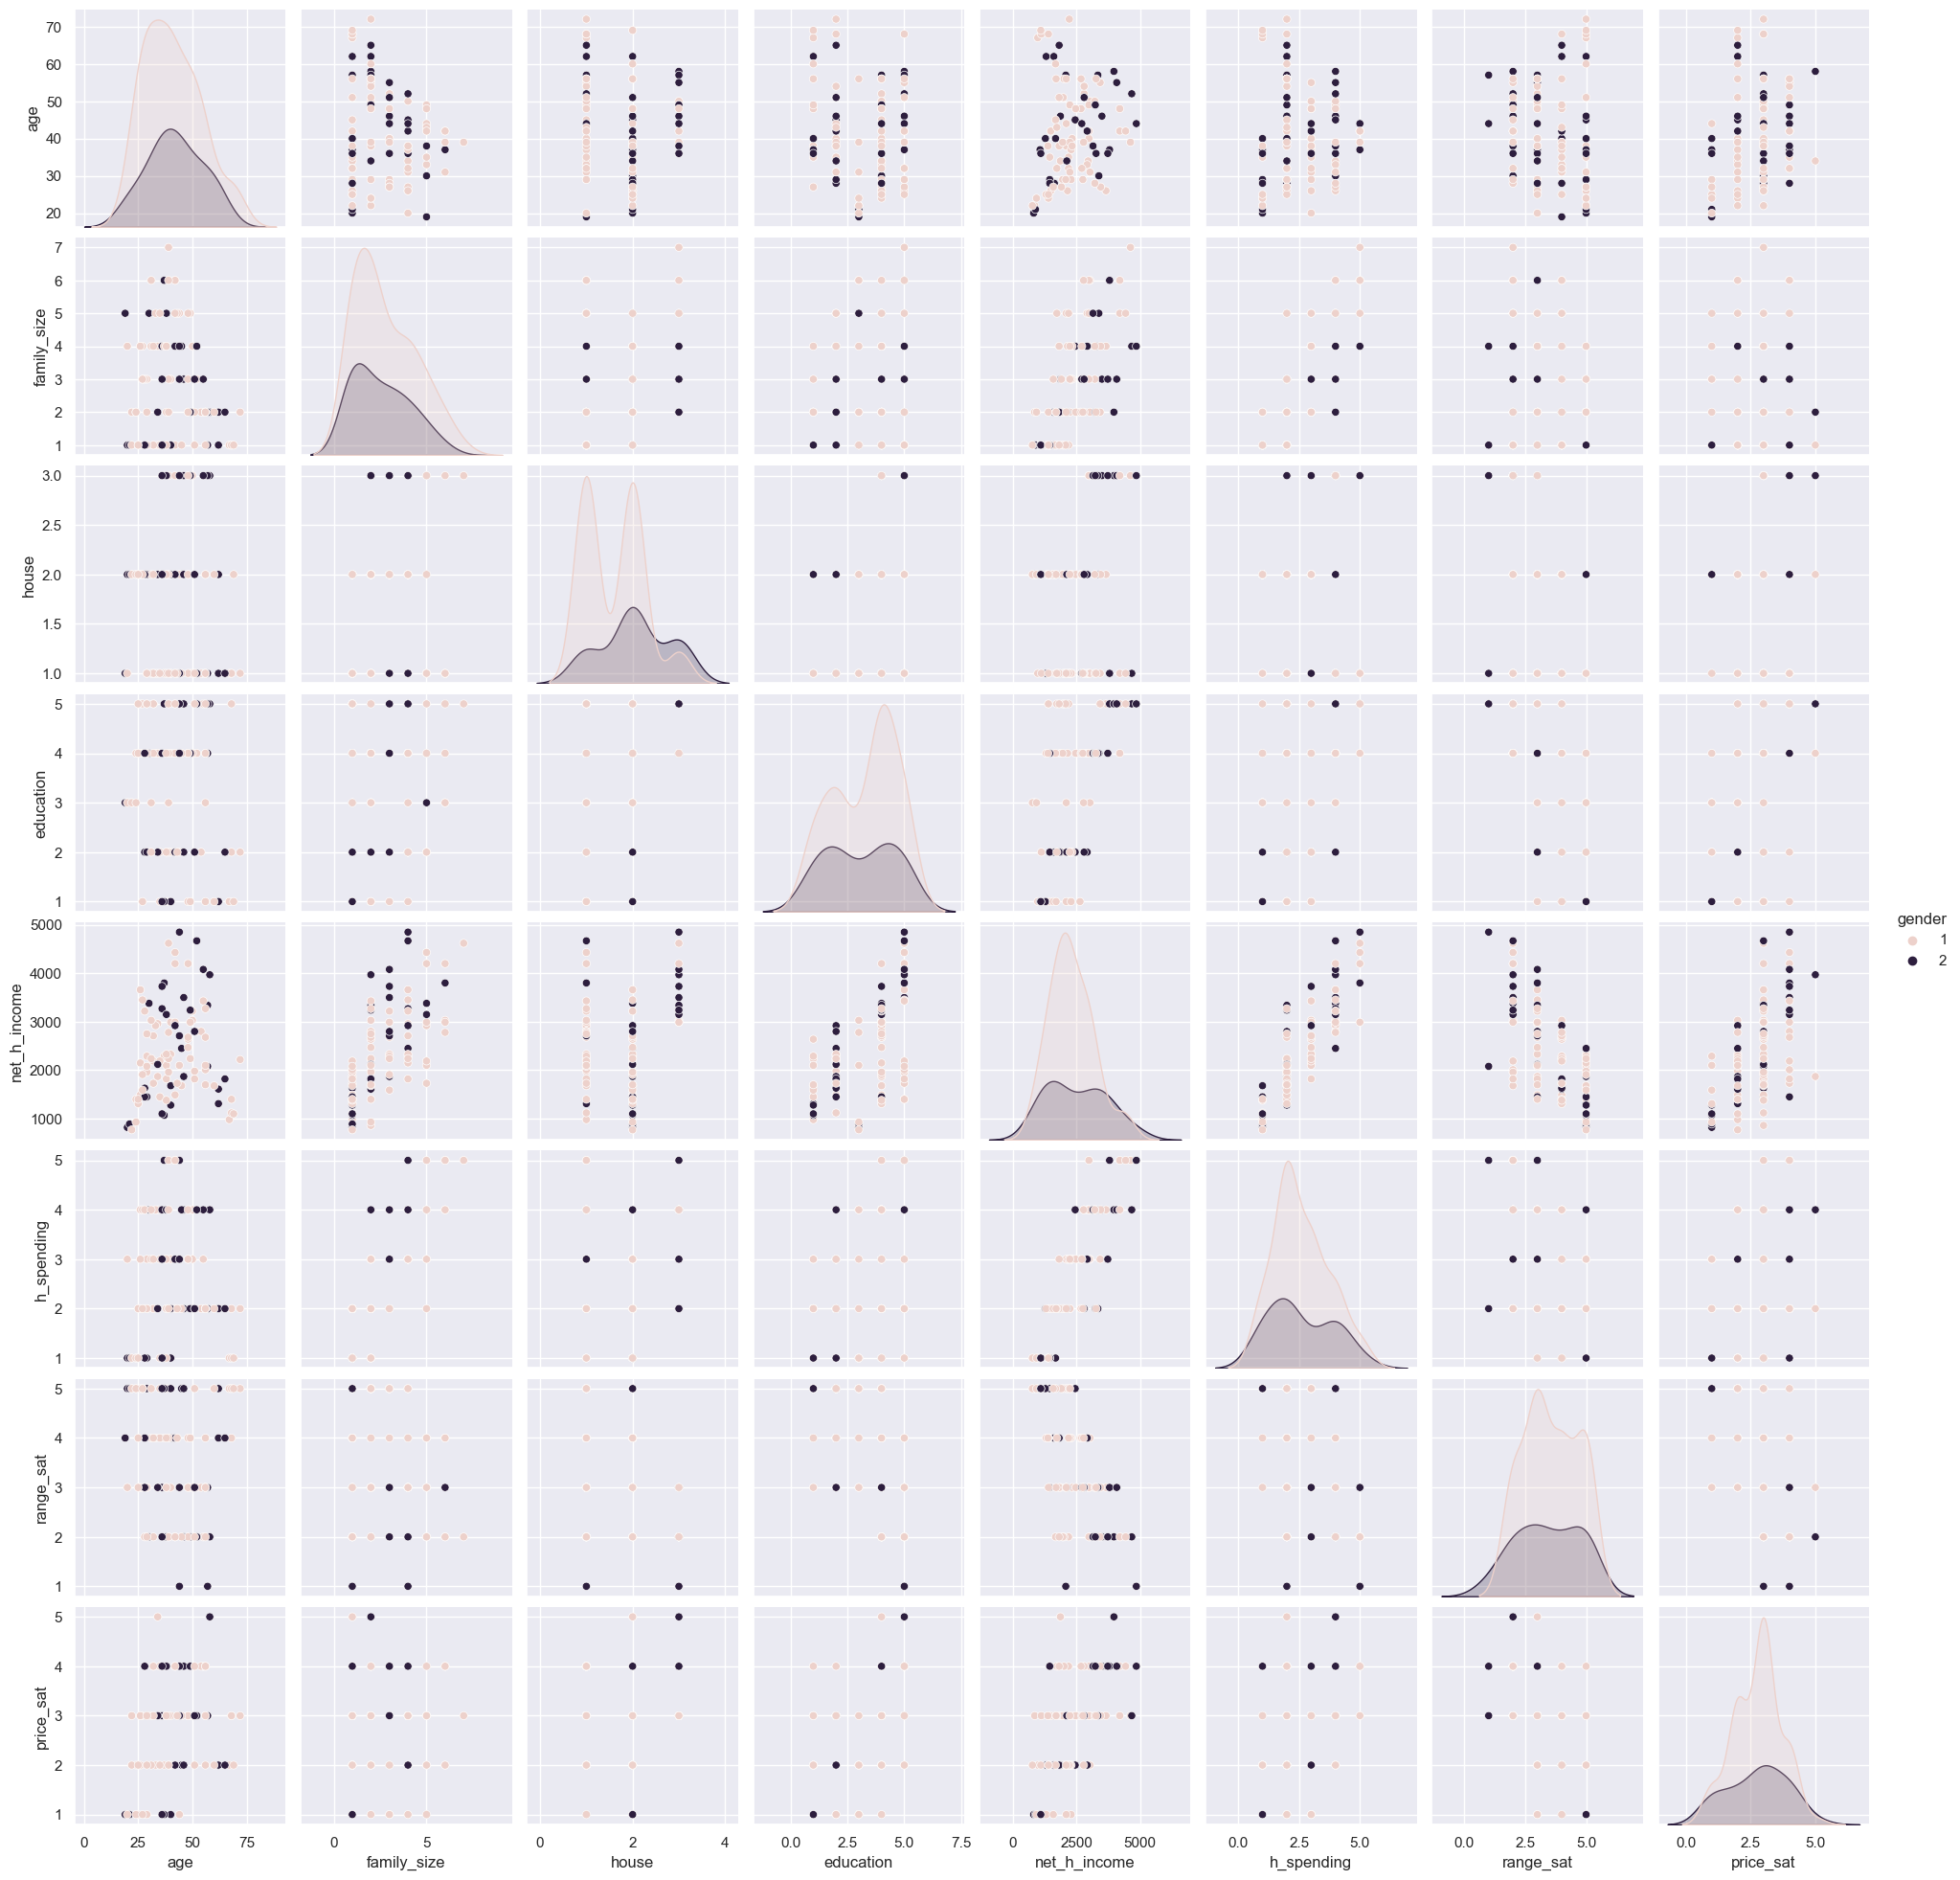

In [15]:
_ = sns.pairplot(data = df, hue="gender")

From this first look we can already see some interesting correlations between different fields, mainly those involving <b>price satisfaction (price_sat)</b> and <b>product range satisfaction (range_sat)</b>. One that's immediately noticeable is the correlation of <b>net household income (net_h_income)</b> and <b>price_sat</b>. It is immediately perceivable to be a (somewhat) linear correlation, and more so than any other field in regards to <b>price_sat</b>. This makes sense logically as the more disposable income a family has, the more tolerance it has for higher prices.
<br><br>
We can take a closer look at this relationship:

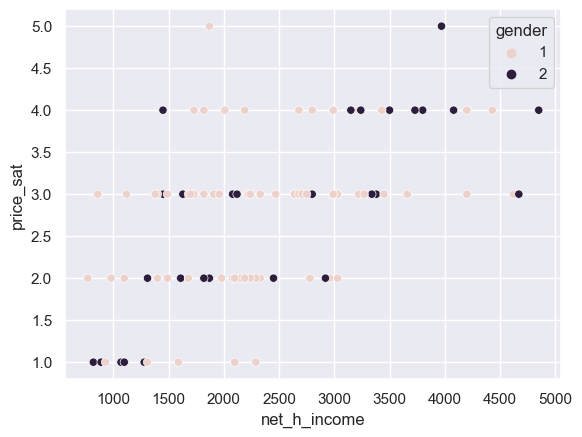

In [5]:
_ = sns.scatterplot(data = df, x = "net_h_income", y = "price_sat", hue = "gender")

With a closer look, we can see that a lot of the customers reside below the 3000 euro point, with what looks like the majority being between 1500 and 3000. We can verify this with a histogram:

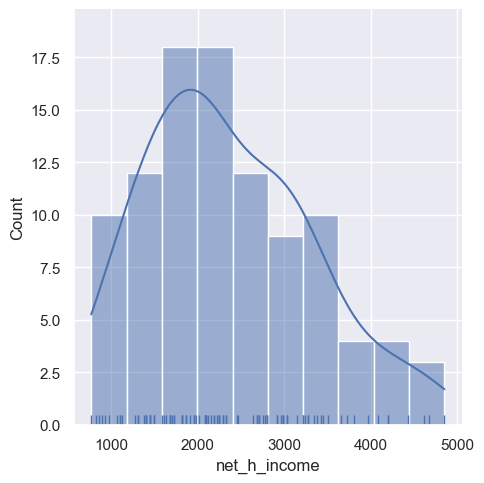

In [61]:
_ = sns.displot(df["net_h_income"], kde=True, bins=10, rug=True)

With a mean income of:

In [9]:
avg_income = sum(df["net_h_income"].dropna())/len(list(df["net_h_income"].dropna()))
print(avg_income)

2365.7


A standard deviation of:

In [35]:
net_h_std = df["net_h_income"].std()

minus_sig = avg_income - net_h_std
plus_sig = avg_income + net_h_std

print(f"Minus one standard deviation: {minus_sig:.2f}\nPlus one standard deviation: {plus_sig:.2f}\nSTD: {net_h_std:.2f}")

Minus one standard deviation: 1405.05
Plus one standard deviation: 3326.35
STD: 960.65


In [55]:
one_sig_mean= 0
within_sig_indices = []

for x in df["net_h_income"].index:
    if df["net_h_income"].loc[x] >= minus_sig and df["net_h_income"].loc[x] <= plus_sig:
        one_sig_mean += 1
        within_sig_indices.append(x)

l = (len(df["net_h_income"].dropna()))


print(f"{one_sig_mean*100/l}% of customers earn between {minus_sig:.2f} euro and {plus_sig:.2f}.")

67.0% of customers earn between 1405.05 euro and 3326.35.


With 67% of customers being represented within a certain range it would make sense to focus on those customers as they represent the majority of the customer base.
<br>
<br>
Another interesting correlation can be seen between <b>net_h_income</b> and <b>Range Satisfaction (range_sat)</b>: 

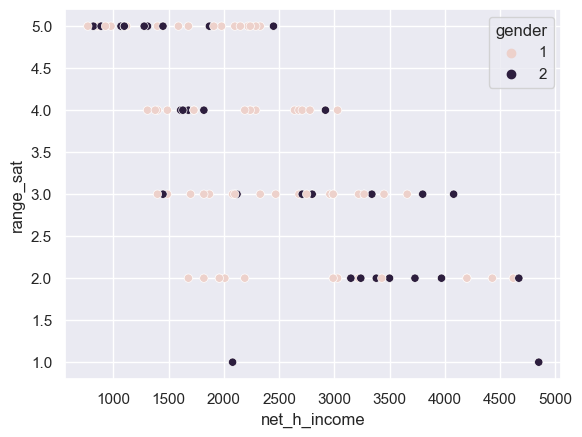

In [66]:
_ = sns.scatterplot(data=df, x="net_h_income", y="range_sat", hue="gender")

At closer inspection we can see that the linear correlation between <b>net_h_income</b> and <b>range_sat</b> "moves" in the opposite direction of the correlation between <b>net_h_income</b> and <b>price_sat</b>. This makes sense logically as the more money people have to spend, the more range they can afford.
<br><br>
This revelation gives way to an interesting opportunity to raise price satisfaction without negatively impacting profits. If we only focus on the denser, already established 67% customer base within 1 standard deviation we can see the average satisfaction for both classes. 

In [67]:
within_sig_avg_price_sat = 0
within_sig_avg_range_sat = 0

for i in within_sig_indices:
    within_sig_avg_price_sat += df["price_sat"].loc[i]
    within_sig_avg_range_sat += df["range_sat"].loc[i]

within_sig_avg_price_sat /= len(within_sig_indices)
within_sig_avg_range_sat /= len(within_sig_indices)

print(f"Avg price sat: {within_sig_avg_price_sat:.3f}, avg range sat: {within_sig_avg_range_sat:.3f}")

Avg price sat: 2.836, avg range sat: 3.493


An obvious solution to raising price satisfaction is to lower prices, however, this is not a suitable solution when it comes to raising or even maintaining profits. One way to achieve at least similar profits would be to equalize the two different satisfaction values. As we can see, with the chosen customer base of 67%, the average satisfaction when it comes to prices is 2.836 whereas with range its 3.493. A good solution to price satisfaction with no to minimal profit loss would be lowering the price while also lowering the range. Depending on the restaurant's current range and the purchasing habits of the customers within our range of (roughly) 1405 euro and 3326 euro, some items on the menu can be dropped based on different conditions; the simplest of which is the ones less bought by the people within our range. For a better system it also pays to look at: the price of ingredients for a certain item, the number of ingredients shared with other items (assuming bulk sale discounts), time to prepare, etc... Following a good system will probably lead to profit increases.